In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_num = df.select_dtypes(np.number)

df_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
df_cat = df.select_dtypes('O')
df_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
df_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#Dropping unwanted columns
df = df.drop('Id',axis = 1)

In [9]:
df_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


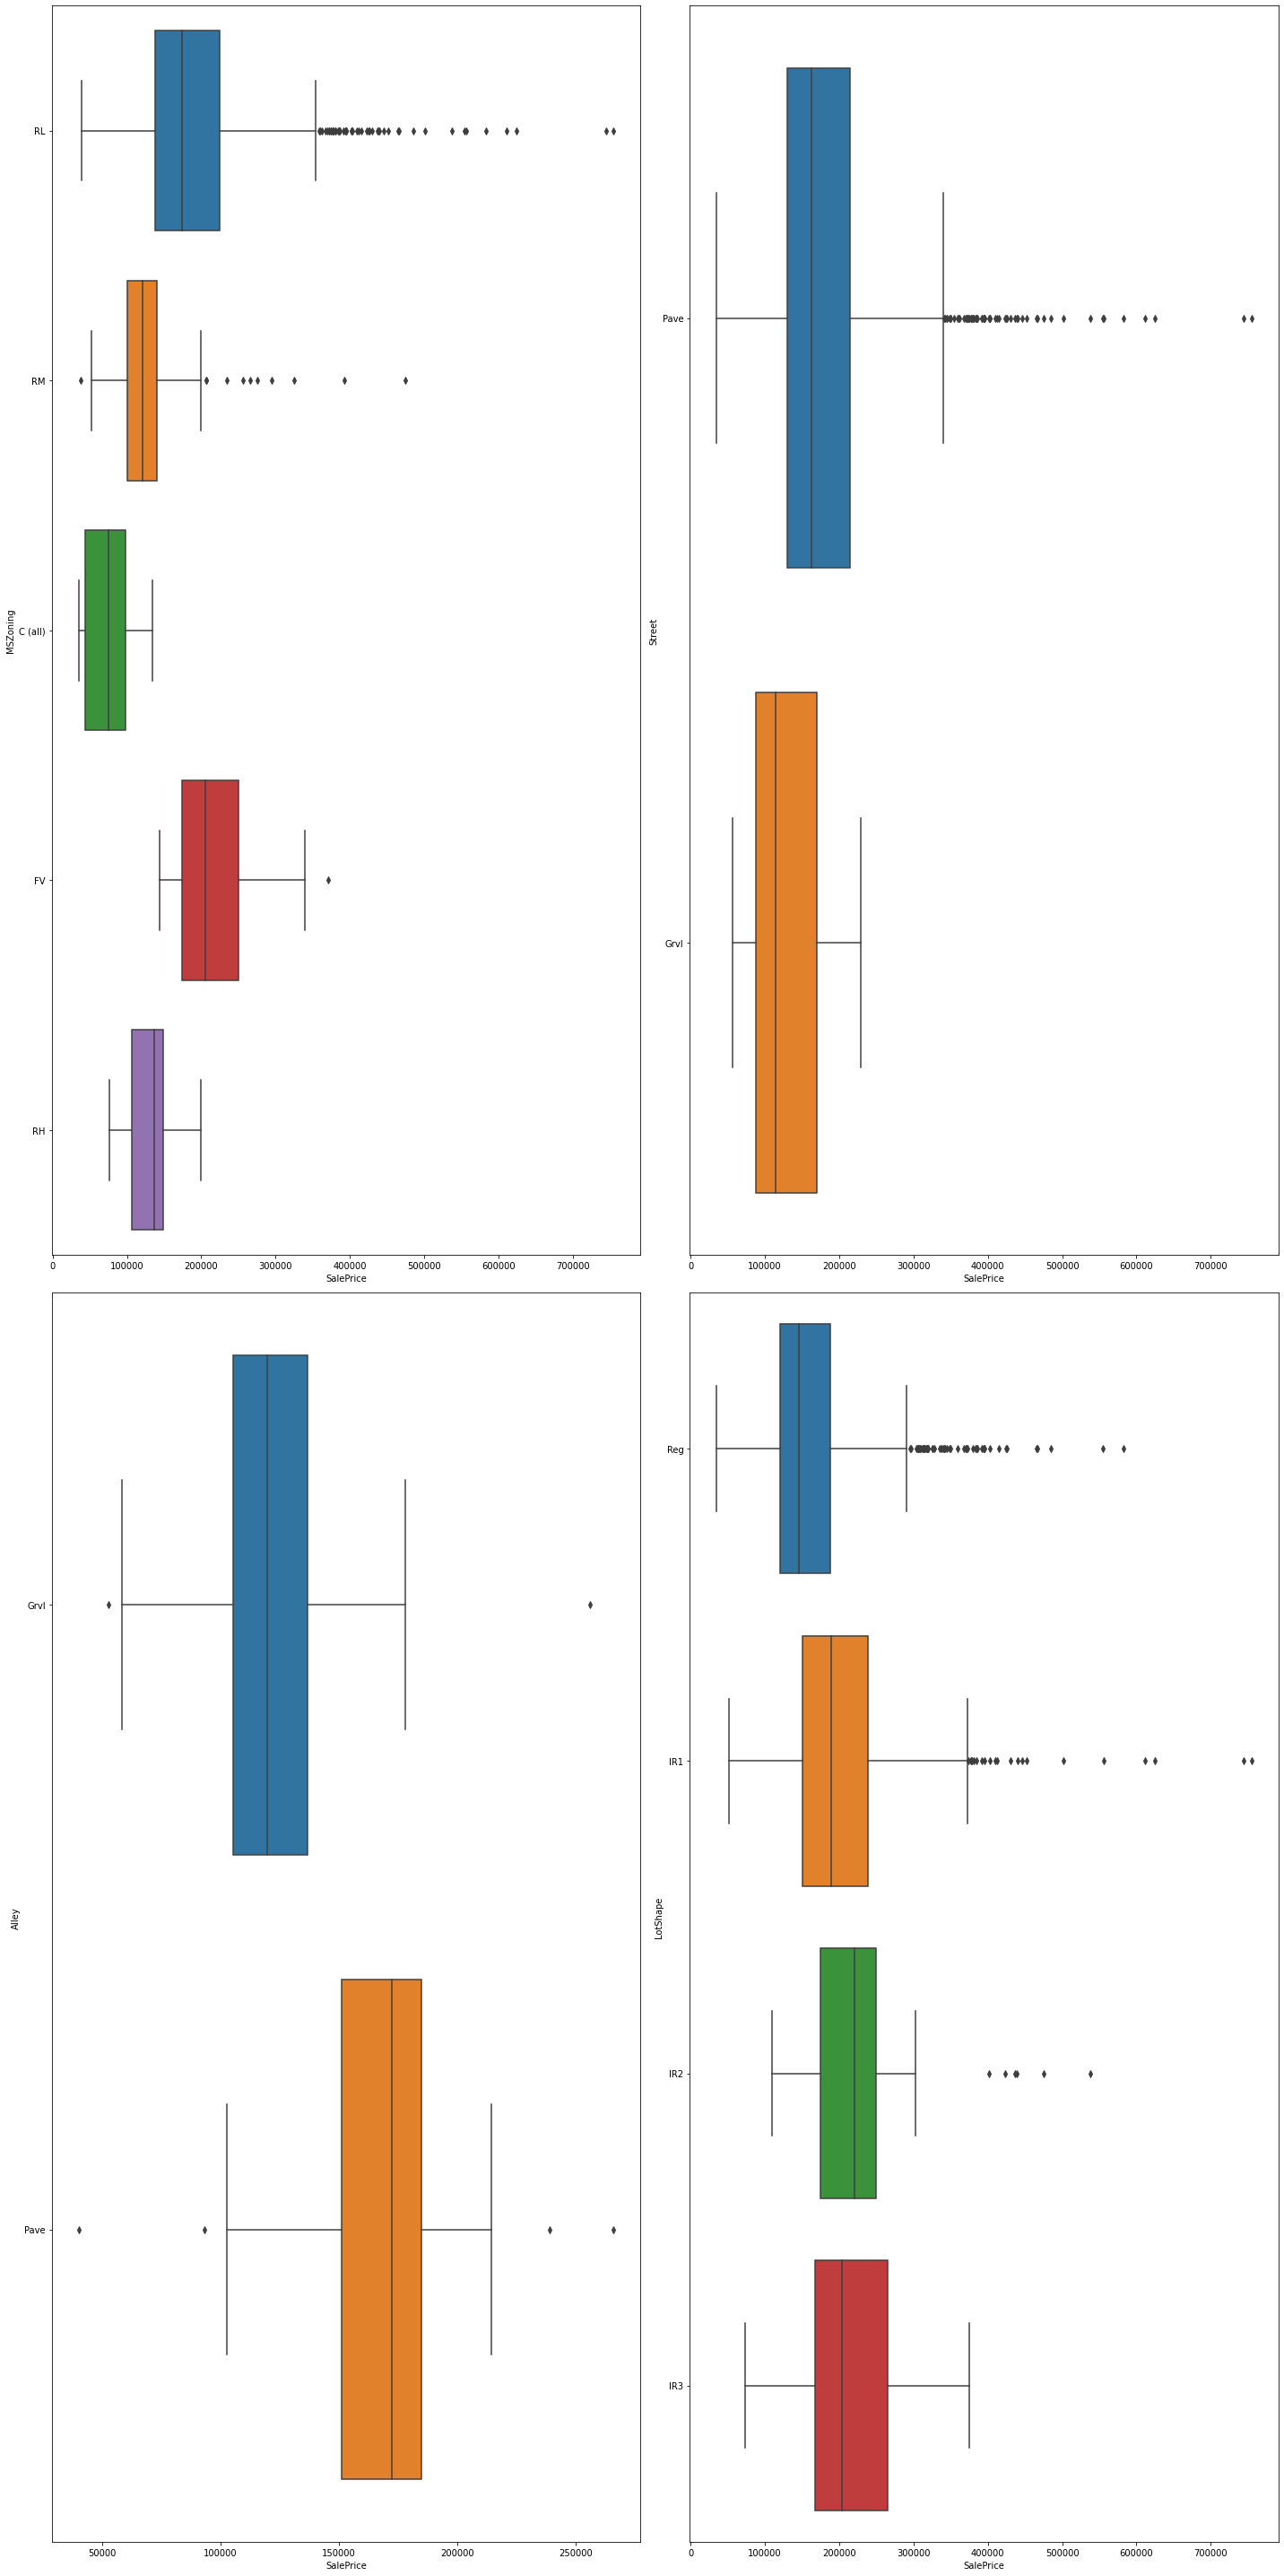

In [10]:
#Visualizing the distribution of Categorical columns

fig,ax = plt.subplots(nrows = 2,ncols = 2, figsize = (20,40))

for i,j in zip(df_cat.columns,ax.flatten()):
    sns.boxplot(y = df_cat[i],x = df['SalePrice'],ax = j)
plt.tight_layout()
plt.show()

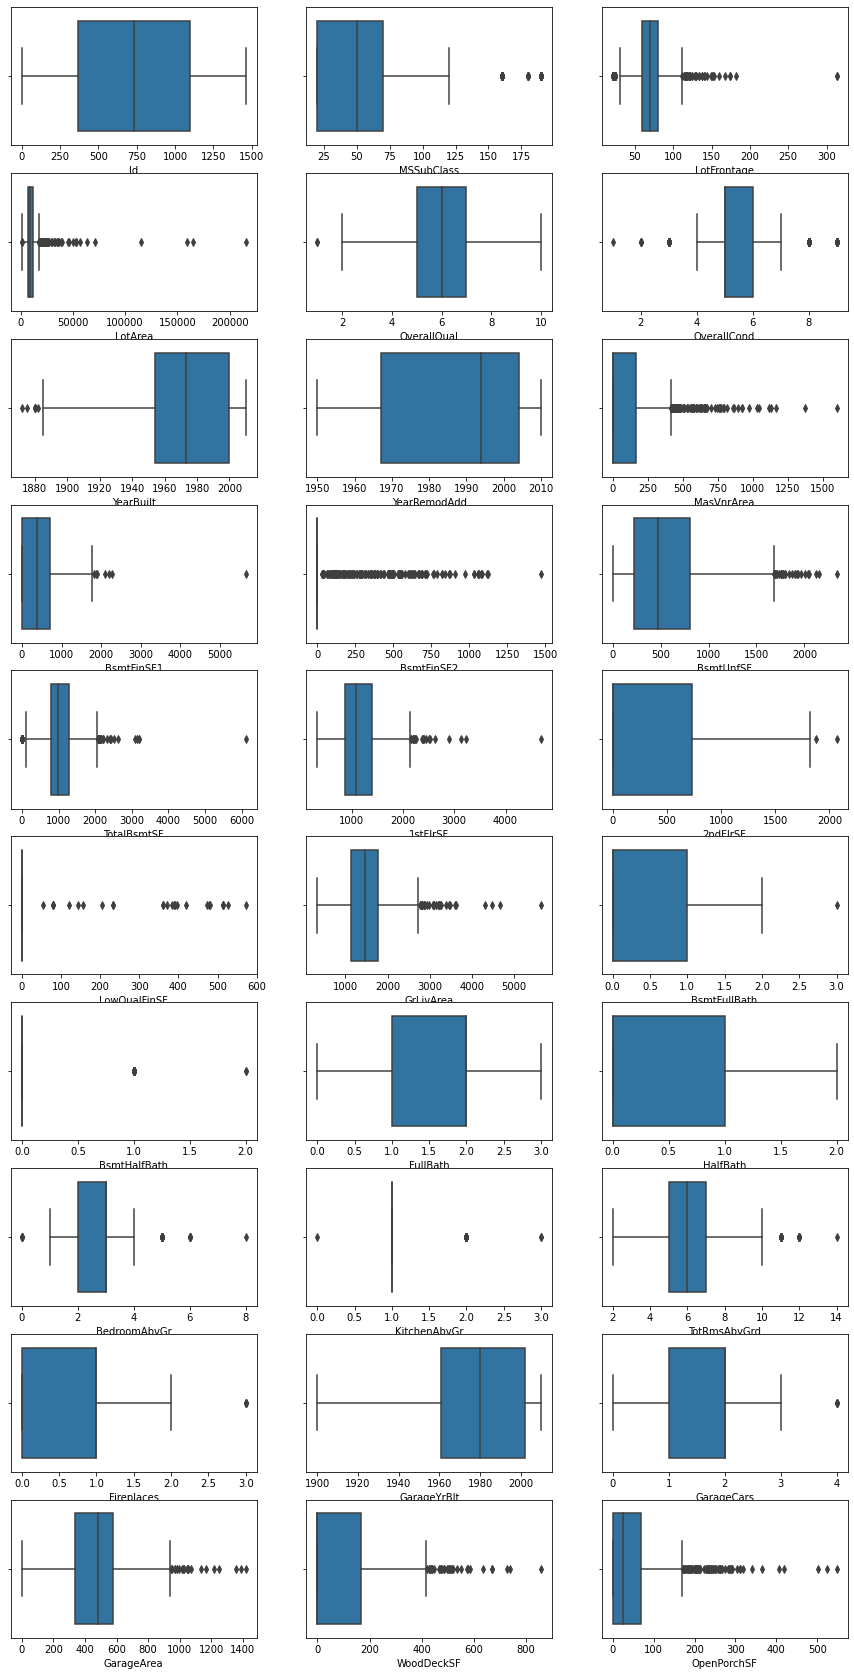

In [11]:
#Visualizing the distribution of Numerical columns

fig,ax = plt.subplots(nrows = 10,ncols = 3, figsize = (15,30))

for i,j in zip(df_num.columns,ax.flatten()):
    sns.boxplot(df_num[i],ax = j)
plt.show()

In [12]:
#Checking for null values

df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [13]:
#Numerical null values

df_num.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
S

In [14]:
#Categorical null values
df_cat.isnull().sum()/len(df)*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [15]:
#Since there are outliers present (not normal), we are imputing the null values with median

from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy = 'median').fit_transform(df_num.values)

df_num = pd.DataFrame(si,index = df_num.index,columns = df_num.columns)

df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [16]:
#Imputing null caegorical values with mode

sim = SimpleImputer(strategy = 'most_frequent').fit_transform(df_cat.values)

df_cat = pd.DataFrame(sim,columns = df_cat.columns,index = df_cat.index)

df_cat.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [17]:
#Scaling the data using standard scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df_num.values)

df_num = pd.DataFrame(ss,index = df_num.index,columns = df_num.columns)

df_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,0.000000,-8.455945e-17,2.798370e-16,-5.840077e-17,1.387018e-16,3.540547e-16,1.046347e-15,4.496860e-15,-3.893385e-17,-2.433366e-17,...,5.596741e-17,3.041707e-17,-2.311697e-17,4.866731e-18,5.475072e-17,1.946692e-17,-2.676702e-17,7.543433e-17,3.567436e-14,1.362685e-16
std,1.000343,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730865,-8.725628e-01,-2.219047e+00,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-9.730182e-01,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00,-1.838704e+00
25%,-0.865432,-8.725628e-01,-4.479400e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.707501e-01,-9.730182e-01,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01,-6.415162e-01
50%,0.000000,-1.631095e-01,-3.922314e-02,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.707501e-01,-1.319022e-01,...,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01,-2.256643e-01
75%,0.865432,3.098594e-01,4.149067e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.383686e-01,5.891327e-01,...,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01,4.165294e-01
max,1.730865,3.147673e+00,1.104155e+01,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.285201e+00,1.140575e+01,...,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01,2.100892e+00,1.645210e+00,7.228819e+00


In [18]:
df = pd.concat([df_cat,df_num],axis = 1)
df.isnull().sum()

MSZoning       0
Street         0
Alley          0
LotShape       0
LandContour    0
              ..
PoolArea       0
MiscVal        0
MoSold         0
YrSold         0
SalePrice      0
Length: 81, dtype: int64

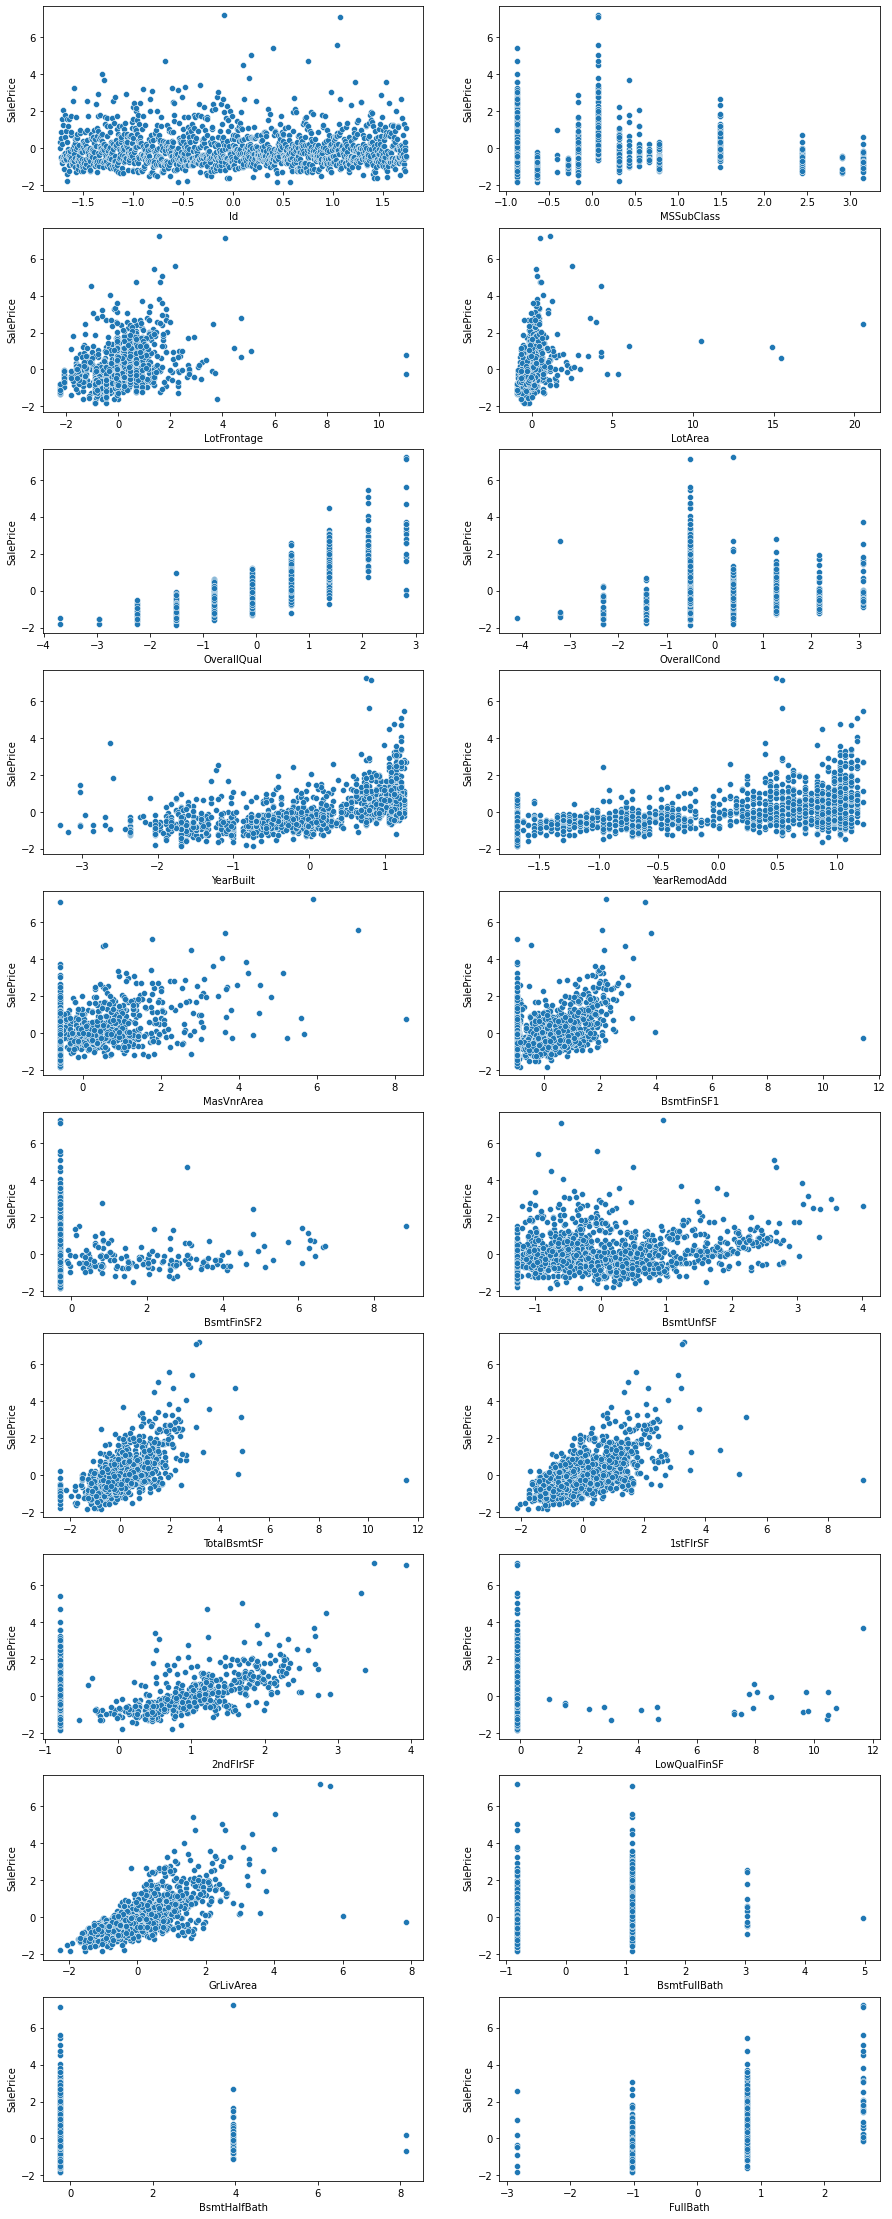

In [19]:
fig,ax = plt.subplots(nrows = 10,ncols = 2, figsize = (15,40))
df_num = df.select_dtypes(np.number)
for i,j in zip(df_num.columns,ax.flatten()):
    sns.scatterplot(df_num[i],df['SalePrice'],ax = j)
    

plt.show()

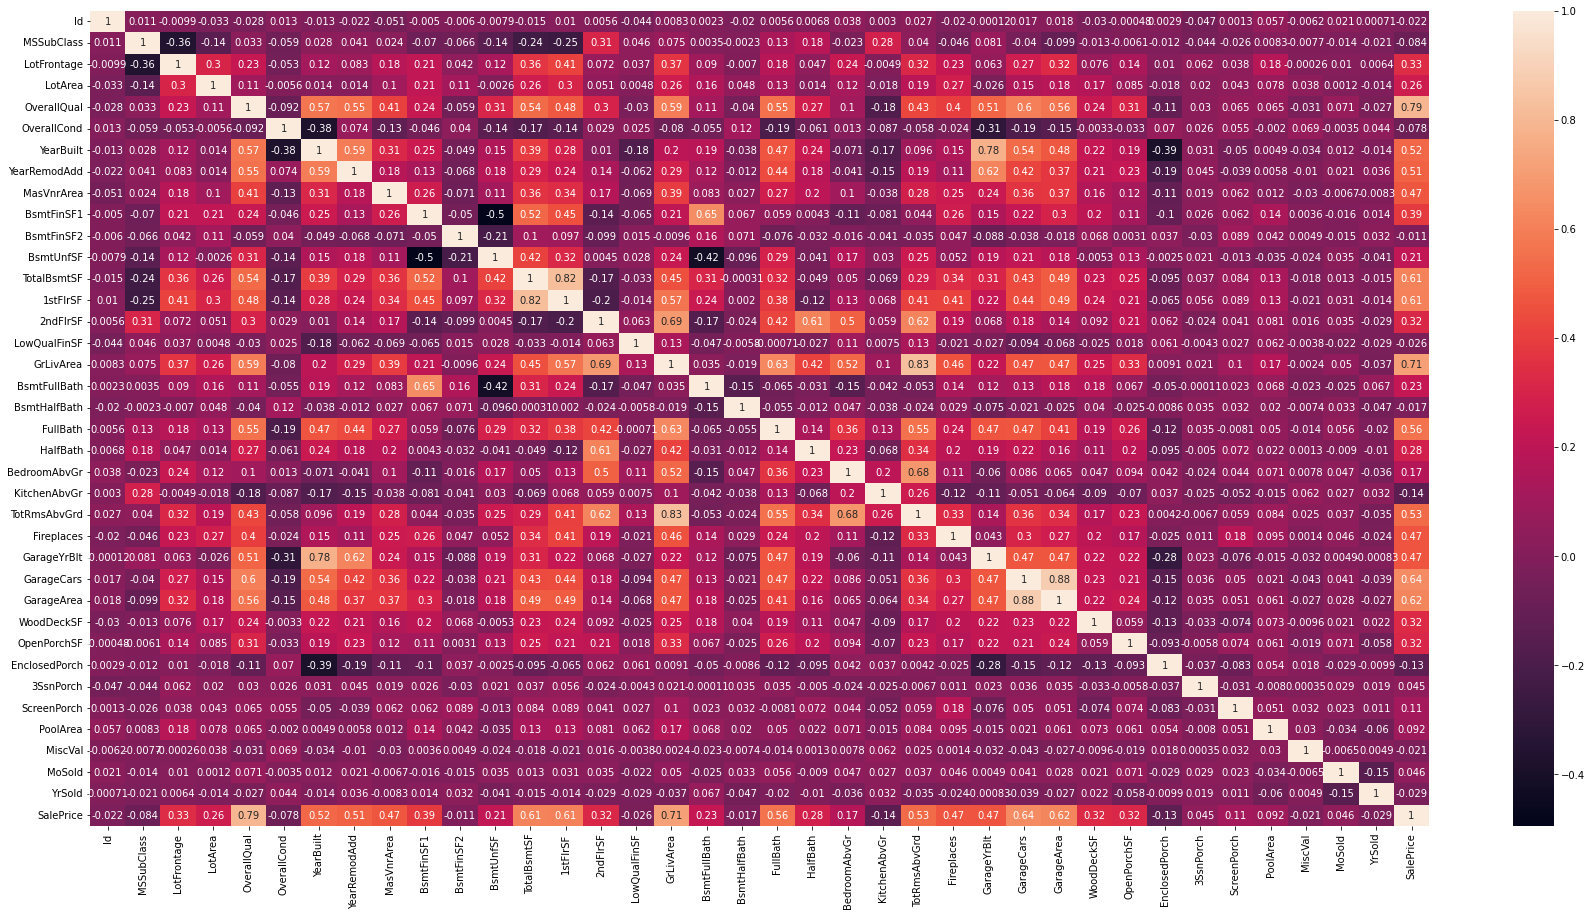

In [20]:
plt.figure(figsize = (30,15))

sns.heatmap(df.corr(),annot = True)

plt.show()

In [21]:
#ML 

x = df.drop('SalePrice',axis = 1)
y = df['SalePrice']

x = pd.get_dummies(x,drop_first = True)


In [22]:
import statsmodels.api as sm

x = sm.add_constant(x)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size  = 0.3 )

In [23]:
model = sm.OLS(y_train,x_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     51.26
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        05:47:20   Log-Likelihood:                -20.592
No. Observations:                1022   AIC:                             503.2
Df Residuals:                     791   BIC:                             1642.
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -66.4758      7.995     -8.314      0.000     -82.171     -50.781
Id                       -0.0015      0.010     -0.147      0.883      -0.021       0.018
MSSubClass               -0.0625      0.060     -1.040      0.299      -0.181       0.056
LotFrontage               0.0133      0.016      0.834      0.404      -0.018       0.044
LotArea                   0.0683      0.018      3.847      0.000       0.033       0.103
OverallQual               0.1471      0.023      6.528      0.000       0.103       0.191
OverallCond               0.0566      0.015      3.751      0.000       0.027       0.086
YearBuilt                 0.0982      0.036      2.740      0.006       0.028       0.169
YearRemodAdd              0.0566      0.018      3.218      0.001       0.022       0.091
MasVnrArea                0.0415      0.016      2.583      0.010       0.010       0.073
BsmtFinSF1                0.0655      0.016      4.019      0.000       0.033       0.097
BsmtFinSF2                0.0207      0.020      1.044      0.297      -0.018       0.060
BsmtUnfSF                -0.0018      0.013     -0.136      0.892      -0.027       0.024
TotalBsmtSF               0.0739      0.020      3.612      0.000       0.034       0.114
1stFlrSF                  0.0706      0.025      2.815      0.005       0.021       0.120
2ndFlrSF                  0.1664      0.028      5.979      0.000       0.112       0.221
LowQualFinSF              0.0018      0.014      0.124      0.902      -0.027       0.030
GrLivArea                 0.1903      0.019      9.784      0.000       0.152       0.229
BsmtFullBath              0.0247      0.015      1.601      0.110      -0.006       0.055
BsmtHalfBath              0.0022      0.011      0.200      0.842      -0.019       0.024
FullBath                  0.0239      0.019      1.275      0.203      -0.013       0.061
HalfBath                  0.0079      0.016      0.480      0.631      -0.024       0.040
BedroomAbvGr             -0.0269      0.017     -1.570      0.117      -0.061       0.007
KitchenAbvGr             -0.0375      0.020     -1.890      0.059      -0.076       0.001
TotRmsAbvGrd              0.0333      0.023      1.431      0.153      -0.012       0.079
Fireplaces                0.0283      0.015      1.859      0.063      -0.002       0.058
GarageYrBlt              -0.0221      0.021     -1.076      0.282      -0.063       0.018
GarageCars                0.0276      0.025      1.110      0.267      -0.021       0.076
GarageArea                0.0475      0.025      1.903      0.057      -0.001       0.096
WoodDeckSF                0.0289      0.011      2.548      0.011       0.007       0.051
OpenPorchSF               0.0026      0.012      0.214      0.830      -0.021       0.026
EnclosedPorch          

In [24]:
from sklearn.metrics import mean_squared_error


y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(rmse_train)
print(rmse_test)

0.24689555594345763
5.724201605416854


In [25]:
#Identifying the significant features from the model based on P value

p_vals = pd.DataFrame(model.pvalues,columns = ['PVALUE'])
significant = p_vals[p_vals['PVALUE'] < 0.05 ]

signi = significant.index.to_list()
signi

['const',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'MSZoning_FV',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LandContour_HLS',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LandSlope_Mod',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_StoneBr',
 'Condition1_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_CBlock',
 'Exterior1st_Stone',
 'Exterior2nd_CBlock',
 'ExterQual_Gd',
 'ExterQual_TA',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav

In [26]:
x_final = x[signi]

x_final = sm.add_constant(x_final)

x_train_final,x_test_final,y_train,y_test = train_test_split(x_final,y,test_size = 0.3)

In [27]:
# Building model using only the significant features
model_final = sm.OLS(y_train,x_train_final).fit()
model_final.summary()

#We can see an increase in the adj r-squared values which denotes 
#that we have added significant variables that contribute to the target

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        05:47:21   Log-Likelihood:                -216.79
No. Observations:                1022   AIC:                             575.6
Df Residuals:                     951   BIC:                             925.6
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.036e+11   1.03e+12      0.778      0.437   -1.22e+12    2.83e+12
LotArea                  0.0919      0.013      7.286      0.000       0.067       0.117
OverallQual              0.1471      0.019      7.553      0.000       0.109       0.185
OverallCond              0.0796      0.013      6.040      0.000       0.054       0.106
YearBuilt                0.1207      0.021      5.779      0.000       0.080       0.162
YearRemodAdd             0.0303      0.016      1.896      0.058      -0.001       0.062
MasVnrArea               0.0356      0.013      2.831      0.005       0.011       0.060
BsmtFinSF1               0.1145      0.013      8.873      0.000       0.089       0.140
TotalBsmtSF              0.1005      0.020      4.960      0.000       0.061       0.140
1stFlrSF                 0.2250      0.091      2.464      0.014       0.046       0.404
2ndFlrSF                 0.2237      0.101      2.209      0.027       0.025       0.422
GrLivArea                0.1200      0.121      0.991      0.322      -0.118       0.358
WoodDeckSF               0.0037      0.011      0.340      0.734      -0.018       0.025
ScreenPorch              0.0382      0.011      3.572      0.000       0.017       0.059
PoolArea                 0.0346      0.015      2.300      0.022       0.005       0.064
MSZoning_FV              0.3808      0.097      3.941      0.000       0.191       0.570
MSZoning_RL              0.1913      0.083      2.293      0.022       0.028       0.355
MSZoning_RM              0.0637      0.085      0.747      0.456      -0.104       0.231
Street_Pave              0.5876      0.169      3.472      0.001       0.255       0.920
LandContour_HLS          0.1838      0.069      2.651      0.008       0.048       0.320
LandContour_Lvl          0.0561      0.050      1.129      0.259      -0.041       0.154
LotConfig_CulDSac        0.1152      0.042      2.760      0.006       0.033       0.197
LandSlope_Mod            0.0532      0.056      0.951      0.342      -0.057       0.163
Neighborhood_NoRidge     0.4466      0.071      6.262      0.000       0.307       0.587
Neighborhood_NridgHt     0.2394      0.056      4.293      0.000       0.130       0.349
Neighborhood_StoneBr     0.4515      0.083      5.472      0.000       0.290       0.613
Condition1_Norm          0.0837      0.031      2.738      0.006       0.024       0.144
Condition2_PosA          0.3271      0.348      0.941      0.347      -0.355       1.009
Condition2_PosN         -0.3658      0.320     -1.144      0.253      -0.993       0.262
Condition2_RRAe      -8.036e+11   1.03e+12     -0.778      0.437   -2.83e+12    1.22e+12
Condition2_RRAn          0.0006      0.001      0.778      0.437      -0.001       0.002
Condition2_RRNn          0.3884      0.328      1.185    

In [28]:
from sklearn.metrics import mean_squared_error

y_pred_train = model_final.predict(x_train_final)
y_pred_test = model_final.predict(x_test_final)

mse_train_final = mean_squared_error(y_train,y_pred_train)



rmse_train_final = np.sqrt(mse_train_final)
print(rmse_train_final)

mse_test_final = mean_squared_error(y_test,y_pred_test)


rmse_test_final = np.sqrt(mse_test_final)
print(rmse_test_final)

0.29914872600776715
54304041813.94301


**Checking assumptions of Linearity with the final model**


<AxesSubplot:>

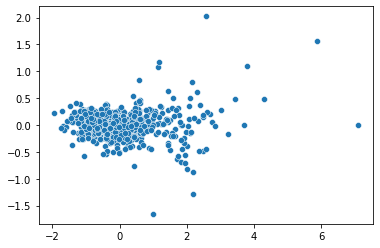

In [29]:
#Checking for linear relationship
sns.scatterplot(model_final.fittedvalues,model.resid)

#Since there is no significant pattern, we can confirm that is a linear relationship.


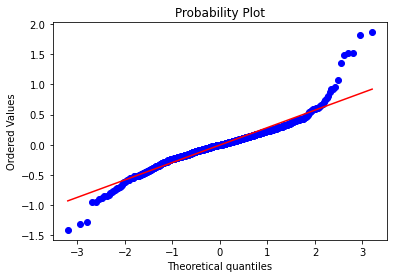

In [30]:
from scipy.stats import probplot

probplot(model_final.resid,plot = plt)

plt.show()

In [31]:
from scipy.stats import shapiro
shapiro(model_final.resid)

ShapiroResult(statistic=0.9290430545806885, pvalue=1.3902246436697224e-21)

In [32]:
model_final.f_pvalue < 0.05

#Model Significant

True